In [1]:
#1. Nischal Joshi
# Advanced Data Mining and Big Data
# Lab Assignment Title: Data Preprocessing and Visualization Lab


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set styling for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Load your dataset
df = pd.read_csv('/Users/nischaljsh/anaconda_projects/lab1/walmart.csv')  # Replace with your dataset path

# Display the first 5 rows
df.head()  

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

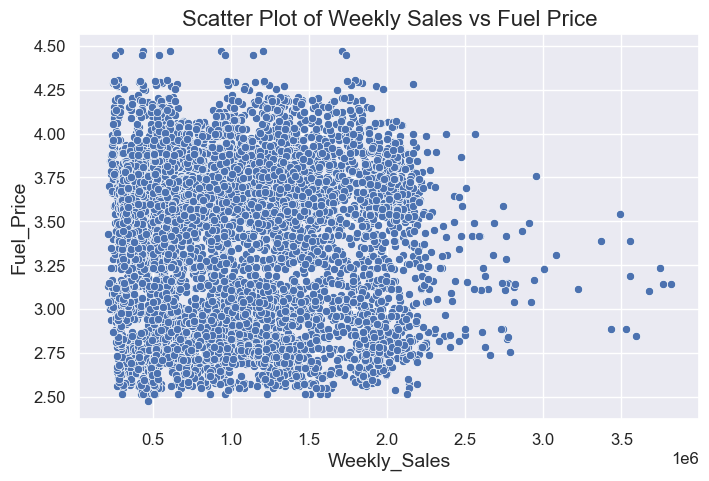

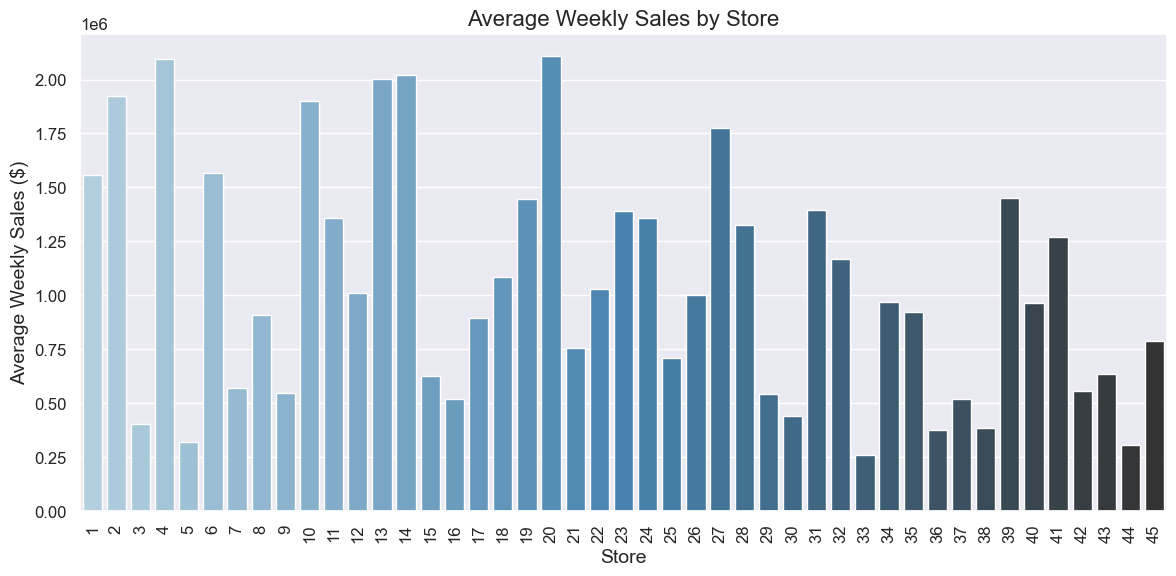

In [27]:
#2.Data Visualization
#Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Weekly_Sales', y='Fuel_Price')  # Replace with relevant columns
plt.title('Scatter Plot of Weekly Sales vs Fuel Price')
plt.show()

#Barchart for the weekly sales
avg_sales_per_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_sales_per_store, x='Store', y='Weekly_Sales', hue='Store', legend=False, palette='Blues_d')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [29]:
# Handling missing data 
missing_values = df.isnull().sum()
print(missing_values.to_dict())

# Fill missing numerical columns with the mean (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)
print(df.isnull().sum().to_dict())

{'Store': 0, 'Date': 0, 'Weekly_Sales': 0, 'Holiday_Flag': 0, 'Temperature': 0, 'Fuel_Price': 6, 'CPI': 0, 'Unemployment': 0}
{'Store': 0, 'Date': 0, 'Weekly_Sales': 0, 'Holiday_Flag': 0, 'Temperature': 0, 'Fuel_Price': 0, 'CPI': 0, 'Unemployment': 0}


In [39]:
#IQR Calculations
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

# Find and count outliers
outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print("\nOutlier values (first 5):")
print(outliers.head()) 

# Shapes before and after
print(f"\nBefore removing outliers: {df.shape}")
df_clean = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]
print(f"After removing outliers: {df_clean.shape}")

Q1: 553350.10
Q3: 1420158.66
IQR: 866808.55
Lower Bound: -746862.73
Upper Bound: 2720371.49
Number of outliers: 34

Outlier values (first 5):
     Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
189      2  24-12-2010    3436007.68             0        49.97       2.886   
241      2  23-12-2011    3224369.80             0        46.66       3.112   
471      4  26-11-2010    2789469.45             1        48.08       2.752   
474      4  17-12-2010    2740057.14             0        46.57       2.884   
475      4  24-12-2010    3526713.39             0        43.21       2.887   

            CPI  Unemployment  
189  211.064660         8.163  
241  218.999550         7.441  
471  126.669267         7.127  
474  126.879484         7.127  
475  126.983581         7.127  

Before removing outliers: (6435, 8)
After removing outliers: (6401, 8)


In [41]:
# Before reduction
df_no_outliers = df_clean
print("Before Reduction:")
print(f"Shape: {df_no_outliers.shape}")
display(df_no_outliers)  # Display first few rows before reduction

# Sampling (50% of data)
df_sampled = df_no_outliers.sample(frac=0.5, random_state=1)

# Performing dimension elimination by dropping a less relevant column,
df_reduced = df_sampled.drop(columns=['CPI'])

# After reduction
print("\nAfter Reduction:")
print(f"Shape: {df_reduced.shape}")
display(df_reduced)  

Before Reduction:
Shape: (6401, 8)


Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6401 rows x 8 columns]


After Reduction:
Shape: (3200, 7)


Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3644     26  03-06-2011    1054454.40             0        60.49       3.973   
1667     12  25-11-2011    1591920.42             1        53.25       3.622   
4365     31  15-07-2011    1415473.91             0        91.05       3.575   
876       7  11-06-2010     498580.87             0        63.59       2.684   
1307     10  25-06-2010    1768172.31             0        90.32       3.084   
...     ...         ...           ...           ...          ...         ...   
2636     19  15-04-2011    1392093.04             0        48.67       3.981   
3568     25  14-09-2012     657241.63             0        60.90       3.948   
5304     38  07-05-2010     383657.44             0        70.15       3.127   
4933     35  17-06-2011     828594.86             0        67.03       3.842   
5964     42  13-01-2012     664348.20             0        51.00       3.477   

      Unemployment  
3644         7.818  
1667        12.890  
4365         7.852  
876          8.963  
1307         9.524  
...            ...  
2636         7.658  
3568         7.280  
5304        14.099  
4933         8.512  
5964         7.545  

[3200 rows x 7 columns]

In [43]:
print("Before Scaling:")
df_reduced[['Temperature', 'Fuel_Price', 'Unemployment']].head()

Before Scaling:


Temperature  Fuel_Price  Unemployment
3644        60.49       3.973         7.818
1667        53.25       3.622        12.890
4365        91.05       3.575         7.852
876         63.59       2.684         8.963
1307        90.32       3.084         9.524

In [115]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaled_minmax = min_max_scaler.fit_transform(df_reduced[['Temperature', 'Fuel_Price', 'Unemployment']])

df_minmax_scaled = df_reduced.copy()
df_minmax_scaled[['Temperature', 'Fuel_Price', 'Unemployment']] = scaled_minmax

print("\nAfter Min-Max Scaling:")
df_minmax_scaled[['Temperature', 'Fuel_Price', 'Unemployment']].head()


After Min-Max Scaling:


Temperature  Fuel_Price  Unemployment
3644     0.612455    0.752004      0.377516
1667     0.541565    0.576152      0.863619
4365     0.911681    0.552605      0.380774
876      0.642808    0.106212      0.487253
1307     0.904533    0.306613      0.541020

In [45]:
from sklearn.preprocessing import StandardScaler

z_score_scaler = StandardScaler()
scaled_z = z_score_scaler.fit_transform(df_reduced[['Temperature', 'Fuel_Price', 'Unemployment']])

df_z_scaled = df_reduced.copy()
df_z_scaled[['Temperature', 'Fuel_Price', 'Unemployment']] = scaled_z

print("\nAfter Z-score Standardization:")
df_z_scaled[['Temperature', 'Fuel_Price', 'Unemployment']].head()


After Z-score Standardization:


Temperature  Fuel_Price  Unemployment
3644    -0.013155    1.339996     -0.082851
1667    -0.406232    0.569500      2.656911
4365     1.646022    0.466328     -0.064485
876      0.155152   -1.489547      0.535648
1307     1.606388   -0.611488      0.838686

In [47]:
# Define bins and labels for temperature
bins = [0, 50, 70, 100]
labels = ['Low', 'Medium', 'High']
df_discrete = df_reduced.copy()
df_discrete['Temperature_Category'] = pd.cut(df_reduced['Temperature'], bins=bins, labels=labels)

print("\nAfter Discretization (Temperature):")
df_discrete[['Temperature', 'Temperature_Category']].head()


After Discretization (Temperature):


Temperature Temperature_Category
3644        60.49               Medium
1667        53.25               Medium
4365        91.05                 High
876         63.59               Medium
1307        90.32                 High

In [139]:
#4. Stastical Analysis of Data: 
#General Overview of Data: 
print("\n****.info()****")
df.info()

# Descriptive statistics
print("\n**** .describe()*****")
df.describe()



****.info()****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB

**** .describe()*****


Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.359191   
std      12.988182  5.643666e+05      0.255049    18.444933     0.458614   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.934500   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [129]:
#Central Tendency
print("Central Tendency")
print("Minimum:\n", df.min(numeric_only=True))
print("\nMaximum:\n", df.max(numeric_only=True))
print("\nMean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode(numeric_only=True).iloc[0])


=== Central Tendency ===
Minimum:
 Store                1.000
Weekly_Sales    209986.250
Holiday_Flag         0.000
Temperature         -2.060
Fuel_Price           2.472
CPI                126.064
Unemployment         3.879
dtype: float64

Maximum:
 Store           4.500000e+01
Weekly_Sales    3.818686e+06
Holiday_Flag    1.000000e+00
Temperature     1.001400e+02
Fuel_Price      4.468000e+00
CPI             2.272328e+02
Unemployment    1.431300e+01
dtype: float64

Mean:
 Store           2.300000e+01
Weekly_Sales    1.046965e+06
Holiday_Flag    6.993007e-02
Temperature     6.066378e+01
Fuel_Price      3.359191e+00
CPI             1.715784e+02
Unemployment    7.999151e+00
dtype: float64

Median:
 Store               23.000000
Weekly_Sales    960746.040000
Holiday_Flag         0.000000
Temperature         62.670000
Fuel_Price           3.445000
CPI                182.616521
Unemployment         7.874000
dtype: float64

Mode:
 Store                1.000
Weekly_Sales    209986.250
Holiday_F

In [131]:
#Dispersion Measures
print("Dispersion Measures")
cols = df.select_dtypes(include='number')

# Range = max - min
range_vals = cols.max() - cols.min()
print("Range:\n", range_vals)

# Quartiles
Q1 = cols.quantile(0.25)
Q2 = cols.quantile(0.50)
Q3 = cols.quantile(0.75)
print("\nQ1:\n", Q1)
print("\nQ3:\n", Q3)

# IQR
IQR = Q3 - Q1
print("\n(IQR):\n", IQR)

# Variance
print("\nVariance:\n", cols.var())

# Standard Deviation
print("\nStandard Deviation:\n",cols.std())

Dispersion Measures
Range:
 Store           4.400000e+01
Weekly_Sales    3.608700e+06
Holiday_Flag    1.000000e+00
Temperature     1.022000e+02
Fuel_Price      1.996000e+00
CPI             1.011688e+02
Unemployment    1.043400e+01
dtype: float64

Q1:
 Store               12.0000
Weekly_Sales    553350.1050
Holiday_Flag         0.0000
Temperature         47.4600
Fuel_Price           2.9345
CPI                131.7350
Unemployment         6.8910
Name: 0.25, dtype: float64

Q3:
 Store           3.400000e+01
Weekly_Sales    1.420159e+06
Holiday_Flag    0.000000e+00
Temperature     7.494000e+01
Fuel_Price      3.735000e+00
CPI             2.127433e+02
Unemployment    8.622000e+00
Name: 0.75, dtype: float64

(IQR):
 Store               22.000000
Weekly_Sales    866808.555000
Holiday_Flag         0.000000
Temperature         27.480000
Fuel_Price           0.800500
CPI                 81.008293
Unemployment         1.731000
dtype: float64

Variance:
 Store           1.686929e+02
Weekly_Sales  

In [137]:
#Correlation Matrix
print("Correlation Matrix")
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

Correlation Matrix


Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.735625e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.735625e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    5.791643e-02      0.010703 -7.876543e-02     0.146037   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.057916 -0.209492      0.223531  
Weekly_Sales    0.010703 -0.072634     -0.106176  
Holiday_Flag   -0.078765 -0.002162      0.010960  
Temperature     0.146037  0.176888      0.101158  
Fuel_Price      1.000000 -0.169502     -0.034844  
CPI            -0.169502  1.000000     -0.302020  
Unemployment   -0.034844 -0.302020      1.000000